# ΠΡΟΓΡΑΜΜΑΤΙΣΤΙΚΗ ΕΡΓΑΣΙΑ ΑΡΙΘΜΗΤΙΚΗΣ ΑΝΑΛΥΣΗΣ

Αρχικά κάνουμε ```import``` τις απαραίτητες βιβλιοθήκες, δηλαδή την ```numpy``` και την ```matplotlib.pyplot``` με την πρώτη να αφορά των κομμάτι των πράξεων μεταξύ των πινάκων και τη  δεύτερη το κομμάτι των διαγραμμάτων που απαιτούνται.  

In [873]:
import numpy as np
import matplotlib.pyplot as plt

# ΠΑΡΑΓΟΝΤΟΠΟΙΗΣΕΙΣ LU ΚΑΙ QR 

Η συνάρτηση ```LUmine``` περιλαμβάνει την υλοποίηση της $LU$ παραγοντοποίησης για έναν τετραγωνικό πίνακα $Α$. Αυτή την συνάρτηση την κράτησα όπως μας δόθηκε στην εκφώνηση της εργασίας, με εξαίρεση ότι εντός των δύο ```for``` loops έβαλα τις γραμμοπράξεις να γίνονται κατευθείαν  στον άνω τριγωνικό πίνακα $U$ και όχι αρχικά στον $A$ και ύστερα να θέτουμε ```U[i, j+1:n] = A[i, j+1:n]``` διότι αυτό δημιουργούσε προβλήματα μετέπειτα στο πρόγραμμά μου.

In [874]:
def LUmine(A):
    n = A.shape[0] # number of rows of matrix A
    L = np.matrix(np.identity(n)) #initialize L as unit matrix
    U = A.copy() # initialize U as A
    for j in range(0,n-1): #iterate through the columns of U and L
        for i in range(j+1,n): #iterate through the rows of U and L
            mult = U[i, j] / U[j, j]
            U[i, j+1:n] = U[i, j+1:n] - mult * U[j, j+1:n] 
            L[i, j] = mult
            U[i, j] = 0 # the elements under the main diagonal should be equal to 0
    return L, U
    

Έλεγχος οτι συνάρτηση ```LUmine``` λειτουργέι σωστά Θέτοντας διάφορους πίνακες ως είσοδο για να δούμε αν το αποτέλεσμα που βγαίνει είναι το επιθυμητό.

In [875]:
from scipy.stats import ortho_group

A = ortho_group.rvs(3)
L_A, U_A = LUmine(A)
print(L_A)
print()
print(U_A)
print()

B = ortho_group.rvs(5)
L_B, U_B = LUmine(B)
print(L_B)
print()
print(U_B)
print()

C = ortho_group.rvs(15)
L_C, U_C = LUmine(C)
print(L_C)
print()
print(U_C)
print()


[[1.         0.         0.        ]
 [1.96676744 1.         0.        ]
 [0.44842023 1.98405777 1.        ]]

[[-0.44414823  0.30893243  0.8410072 ]
 [ 0.         -0.54825124 -2.13719319]
 [ 0.          0.          4.10669493]]

[[ 1.          0.          0.          0.          0.        ]
 [-0.1376965   1.          0.          0.          0.        ]
 [-0.50839136 -0.29937782  1.          0.          0.        ]
 [ 0.29319117 -0.49858289  1.82691701  1.          0.        ]
 [-0.0392125   0.77462214 -1.25025022 -0.42911829  1.        ]]

[[-0.85594582 -0.08570453  0.0422244  -0.50283351 -0.07339648]
 [ 0.         -0.72187359  0.60928261 -0.14694685  0.324099  ]
 [ 0.          0.          0.53889486 -1.00247822 -0.3103757 ]
 [ 0.          0.          0.          2.38364939  0.40955086]
 [ 0.          0.          0.          0.         -1.25992922]]

[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.

Μια περίληψη της μεθόδου Gram-Schmidt όπως παρουσιάζεται στο υλικό του μαθήματος είναι η εξής:

Αρχικά ο πίνακας $A$ υπό μορφή διανυσμάτων στηλών:

\[
\begin{array}{ccc}
a_1 &|& a_2 &|& ... &|& a_n \\
\end{array}
\]

\begin{align}
& u_1 = a_1 &,&  e_1 = \frac{u_1} {||u_1||} \\
& u_2 = a_2 - (a_2*e_1)e_1 &,& e_2 = \frac{u_2} {||u_2||} \\
& u_{k+1} = a_{k+1} - (a_{k+1}*e_1)e_1 - ... - (a_{k+1}*e_k)e_k &,& e_{k+1} = \frac{u_{k+1}} {||u_{k+1}||} \\
\end{align}

Η συνάρτηση ```QRmine``` περιλαμβάνει την υλοποίσηση της παραγοντοποίησης $QR$ με χρήση της μεθόδου Gram-Schmidt. Στο πρώτο ```for``` loop πρέπει να διατρέξουμε όλες τις στήλες του πίνακα $A$ έτσι ώστε σύμφωνα με την μέθοδο να πάρουμε όλα τα διανύσματα στήλες $a_i$ του πίνακα $A$ , δηλαδή όλες τις στήλες του προκειμένου να υπολογίσουμε κάθε διάνυσμα-στήλη του ορθογώνιου πίνακα $Q$ όπως φαίνεται παραπάνω.  Στο δεύτερο ```for``` loop υπολογίζουμε όλες τις προβολές και τις αφαιρούμε από το αρχικό διάνυσμα $a_i^T$ ώστε να υπολογίσουμε τελικά το $u_i$. Άρα  τα όριά του είναι από $0$, δηλαδή από το $e_0$, όπου $e$ είναι τα διανύσματα στήλες του ορθογώνιου πίνακα $Q$ έως και ένα διάνυσμα πριν από το διάνυσμα που υπολογίζουμε, όπως φαίνεται από τις παραπάνω σχέσεις. Δηλαδή π.χ. για ```j = 1``` θα ισχύει ότι ```i = 0 , i = 1``` οπότε από το δεύτερο διάνυσμα θα αφαιρεθούν οι προβολές των δύο πρώτων κ.ο.κ. 

Επίσης σύμφωνα με τον ορισμό του άνω τριγωνικού πίνακα $R$ υπολογίζουμε ανάλογα τα στοιχεία του και τέλος απο το ```q``` αφαιρουμε κάθε φορά την προβολή που ορίζεται από τα ```i,j``` σύμφωνα με τον ορισμό της προβολής ο οποίος έχει ως εξής: 

\begin{equation}
proj_ua = \frac{<u,a>}{<u,u>} u
\end{equation} 



In [876]:
def QRmine(A):
    n = A.shape[0]
    Q = np.matrix(np.zeros((n,n)))
    R = np.matrix(np.zeros((n,n)))
    for j in range(0,n): # iterate through the columns of matrix A 
        q = A[:,j]
        for i in range(0,j+1): # iterate through the columns of matrix A 
            length_of_leg = np.sum(A[:,j].T * Q[:,i]) # dot product
            q = q - length_of_leg * Q[:,i] 
            R[i,j] = length_of_leg
        Q[:,j] = q / np.linalg.norm(q)
        R[j,j] = np.sum(A[:,j].T * Q[:,j])

    #print(Q.T * Q)
    #print(Q * R)
    #print(np.linalg.norm(A - Q*R)) # check if it is correct
    return Q, R

Έλεγχος οτι συνάρτηση ```QRmine``` λειτουργέι σωστά

In [877]:
A = np.matrix('1 2 3 4 5; 3 4 7 6 7 ; 1 4 5 7 6; 1 4 3 2 6 ; 8 9 6 7 5')
QRmine(A)


(matrix([[ 0.11470787,  0.18654244,  0.23734324,  0.33285462,  0.88595712],
         [ 0.3441236 ,  0.07075748,  0.83599245, -0.39995016, -0.13314962],
         [ 0.11470787,  0.67541227,  0.11338053,  0.59157281, -0.40969115],
         [ 0.11470787,  0.67541227, -0.36735292, -0.60593071,  0.1689976 ],
         [ 0.91766294, -0.21870492, -0.31141853,  0.11016922, -0.03072684]]),
 matrix([[ 8.71779789, 10.78253949,  9.17662935,  9.97958442,  8.94721362],
         [ 0.        ,  4.09106858,  5.14599821,  5.71849051,  8.43943707],
         [ 0.        ,  0.        ,  4.16030962,  3.84435587,  3.9577364 ],
         [ 0.        ,  0.        ,  0.        ,  2.63205033, -0.67067928],
         [ 0.        ,  0.        ,  0.        ,  0.        ,  1.89994272]]))

# ΠΙΝΑΚΕΣ HILBERT

α. Υλοποίηση της συνάρτησης που δημιουργεί έναν ```nxn``` πίνακα Hilbert όπως αυτός ορίζεται , δηλαδή με στοιχέια της μορφής:
\begin{equation}
H_{ij} = \frac{1}{i + j + 1}
\end{equation} 

In [878]:
def Hilbert_matrix(n):
    H = np.matrix(np.zeros((n,n))) #initialize an nxn matrix with zeros
    n = H.shape[0]
    for i in range(0,n):
        for j in range(0,n):
            H[i,j] = 1 / (i + j + 1) # add to each element its value

    return H

Έλεγχος ότι η συνάρτηση ```Hilbert_matrix``` λειτουργεί σωστά

In [879]:
for n in range(2,100):
    H = Hilbert_matrix(n)
    #print(H)
H = Hilbert_matrix(4)
L_H , U_H = LUmine(H)
print(L_H)

[[1.         0.         0.         0.        ]
 [0.5        1.         0.         0.        ]
 [0.33333333 1.         1.         0.        ]
 [0.25       0.9        1.5        1.        ]]


β. επίλυση του συστήματος $Hx = b$ όπου $H = QR$ οπότε αρκεί να λύσουμε το $Rx = Q^Tb$ το οποίο μπορούμε να κάνουμε με την χρήση των παρακάτω συναρτήσεων ```system_solve_LU(A, b)``` και ```solve_system_QR(A,b)```είτε να κάνουμε με την χρήση της συνάρτησης ```np.linalg.solve``` . Οι δύο πρώτες συναρτήσεις είναι βασισμένες στους τύπους του βιβλίου σελ. 193 που αναφέρονται στην επίλυση άνω και κάτω τριγωνικών συστημάτων.

In [880]:
def solve_system_LU(A, b):
    L, U = LUmine(A)
    n = A.shape[0]
    y = np.empty((n,1)) # first we solve L y = b 
    x = np.empty((n,1)) # then we solve U x = y
    for k in range(n): # Ly = b is a lower triangular system
        sum = b[k] - np.dot(L[k, :k] , y[:k]) 
        y[k] = sum / L[k,k]

    for k in range(n-1, -1,-1): # Ux = y is an upper triangular system
        sum = y[k] - np.dot(U[k, k+1:] , x[k+1:]) 
        x[k] = sum / U[k,k] 

    return x    

def solve_system_QR(A,b):
    Q, R = QRmine(A)
    n = A.shape[0]
    x = np.empty((n,1)) #  we will solve R x = Q^T b which is an upper triangular system
    y = Q.T * b
    for k in range(n-1, -1,-1): # Ux = y
        sum = y[k] - np.dot(R[k, k+1:] , x[k+1:]) 
        x[k] = sum / R[k,k] 

    return x

def solve_Hx_b_with_QR(n):
    b = np.ones((n,1))
    H = Hilbert_matrix(n) 
    x = solve_system_QR(H,b)

    return x


ή επίλυση του συστήματος $Hx = b$ όπου $H = LU$ όπου αρκεί να λύσουμε τα συστήματα $Ly  = b$ ως προς ```y``` και $Ux = y$  χρησιμοποιώντας την παραπάνω συνάρτηση ```system_solve_LU(A, b)```

In [881]:
def solve_Hx_b_with_LU(n):
    b = np.ones((n,1))
    H = Hilbert_matrix(n) 
    x = solve_system_LU(H,b)

    return x

In [882]:
LU_solution = solve_Hx_b_with_LU(4)
QR_solution = solve_Hx_b_with_QR(4)
print(LU_solution)
print(QR_solution)

[[  -4.]
 [  60.]
 [-180.]
 [ 140.]]
[[  -3.99999998]
 [  59.99999978]
 [-179.99999947]
 [ 139.99999966]]


γ. επίλυση του $Hx = bnew$ με $QR$ παραγονντοποίηση όπου ```b_new``` το διάνυσμα που προκύπτει από τις γραμμες: ```b = np.ones((n,1))``` και ```b[0] = b[0] + 10**(-15)``` με ```b_new = b```

In [883]:
def solve_Hx_b_with_QR_new(n):
    b = np.ones((n,1))
    b = b + 1e-15
    H = Hilbert_matrix(n) 
    x = solve_system_QR(H,b)

    return x

ή επίλυση του $Hx = bnew$ με $LU$ παραγονντοποίηση όπου ```b_new``` το διάνυσμα που προκύπτει από τις γραμμες: ```b = np.ones((n,1))``` και ```b[0] = b[0] + 10**(-15)``` με ```b_new = b```

In [884]:
def solve_Hx_b_with_LU_new(n):
    b = np.ones((n,1))
    b = b + 1e-15
    H = Hilbert_matrix(n) 
    x = solve_system_LU(H,b) 

    return x

In [885]:
x_new_QR = solve_Hx_b_with_QR_new(10)
x_QR = solve_Hx_b_with_QR(10)
x_new_LU = solve_Hx_b_with_LU_new(10)
x_LU = solve_Hx_b_with_LU(10)
print(f"QR absolute diferrence: {np.max(np.abs(x_QR - x_new_QR))}")
print(f"LU absolute diferrence: {np.max(np.abs(x_LU - x_new_LU))}")

QR absolute diferrence: 5.3085386753082275e-08
LU absolute diferrence: 0.0004783123731613159


Το αποτέλεσμα της γραμμης ```np.max(np.abs(x - xnew))``` που υπολογίζει την μέγιστη διαφορά της πρώτης τιμής ```x``` και της νέας τιμής ```xnew``` όπου η δεύτερη προκύπτει με προσάυξηση του ```b[0]``` κατά $10^-15$ είναι το αναμενόμενο εφόσον προκύπτει μια διαφορά αντίστοιχης τάξης με την απόκλιση που θέσαμε και για τις δύο μεθόδους. Μάλιστα παρατηρούμε ότι με χρήση της $QR$ παραγοντοποίσης έχουμε μικρότερη απόκλιση.  Οι παρατηρήσεις αυτές φαίνονται και στο παρακάτω διάγραμμα

δ. Δημιουργία κοινού διαγράμματος με το n στον οριζόντιο άξονα και την μέγιστη απόλυτη διαφορά με χρήση και των δύο μεθόδων στον κατακόρυφο άξονα.

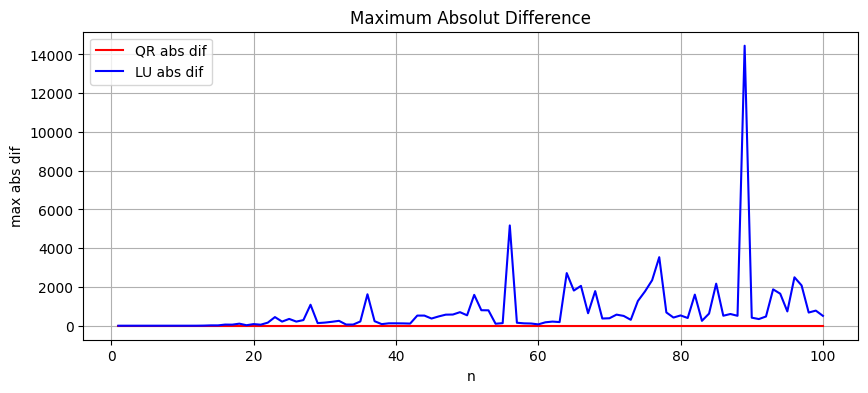

In [886]:
n = []

for i in range(1,100+1):
    n.append(i)
y_QR = []
y_LU = []
for i in n: # calculate the absolute difference for multiple values of n
    H = Hilbert_matrix(i) 
    x_new_QR = solve_Hx_b_with_QR_new(i)
    x_QR = solve_Hx_b_with_QR(i)
    x_new_LU = solve_Hx_b_with_LU_new(i)
    x_LU = solve_Hx_b_with_LU(i)
    y_QR.append(np.max(np.abs(x_QR - x_new_QR)))
    y_LU.append(np.max(np.abs(x_LU - x_new_LU)))



plt.figure(figsize=(10,4))
plt.plot(n,y_QR,"r", label = "QR abs dif")
plt.plot(n,y_LU,"b", label = "LU abs dif")
plt.xlabel("n")
plt.ylabel("max abs dif")
plt.title("Maximum Absolut Difference")
plt.grid(True)
plt.legend(loc = "upper left")
plt.show()

Και ξεχωριστά:

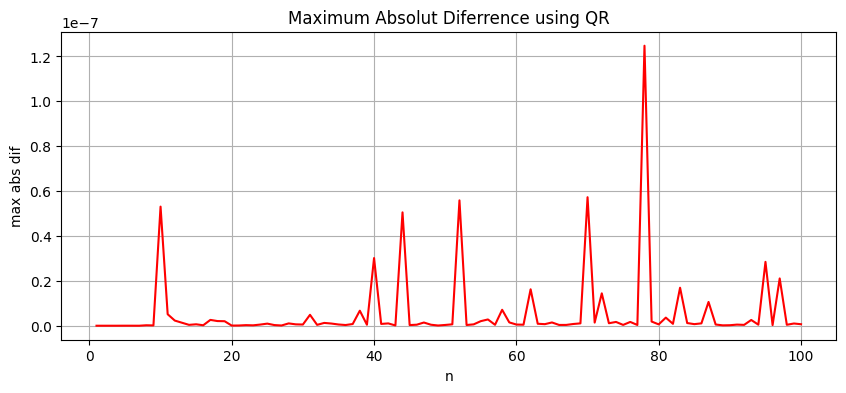

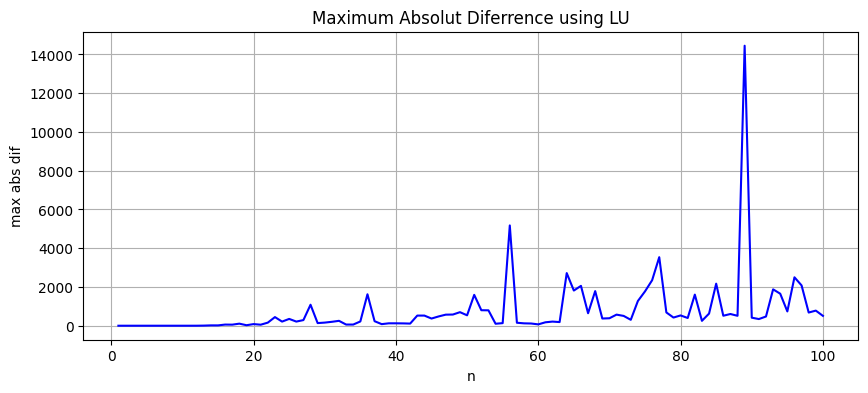

In [887]:
plt.figure(figsize=(10,4))
plt.plot(n,y_QR,"r")
plt.xlabel("n")
plt.ylabel("max abs dif")
plt.title("Maximum Absolut Diferrence using QR")
plt.grid(True)
plt.show()

plt.figure(figsize=(10,4))
plt.plot(n,y_LU,"b")
plt.xlabel("n")
plt.ylabel("max abs dif")
plt.title("Maximum Absolut Diferrence using LU")
plt.grid(True)
plt.show()

Τελικά προκύπτει η αρχική παρατήρηση, δηλαδή ότι η μέθοδος $QR$ έχει αρκετές τάξεις μεγέθους μικρότερο σφάλμα από το αντίστοιχο της $LU$ κάτι που γίνεται αισθητό  τιμές του ```n``` μεγαλύτερες του 13 και όσο μεγαλώνει το ```n``` αυξάνεται και αυτή η διαφορά στο σφάλμα 

ε. Υπολογισμός του $Η*Η^{-1}$ της διαφοράς του μοναδιαίου πίνακα ```np.identity(n)```και του πίνακα $Η*Η^{-1}$

In [888]:
def H_inverse_unit(n):
    H = Hilbert_matrix(n)
    A = H * np.linalg.inv(H)
    #print(A)
    x = np.linalg.norm(np.identity(n) - A)
    return x

έλεγχος για το αν λειτουργεί σωστά η ```H_inverse_unit```

In [889]:
H_inverse_unit(5)

1.0558402791593794e-11

Δημιουργία του διαγράμματος 

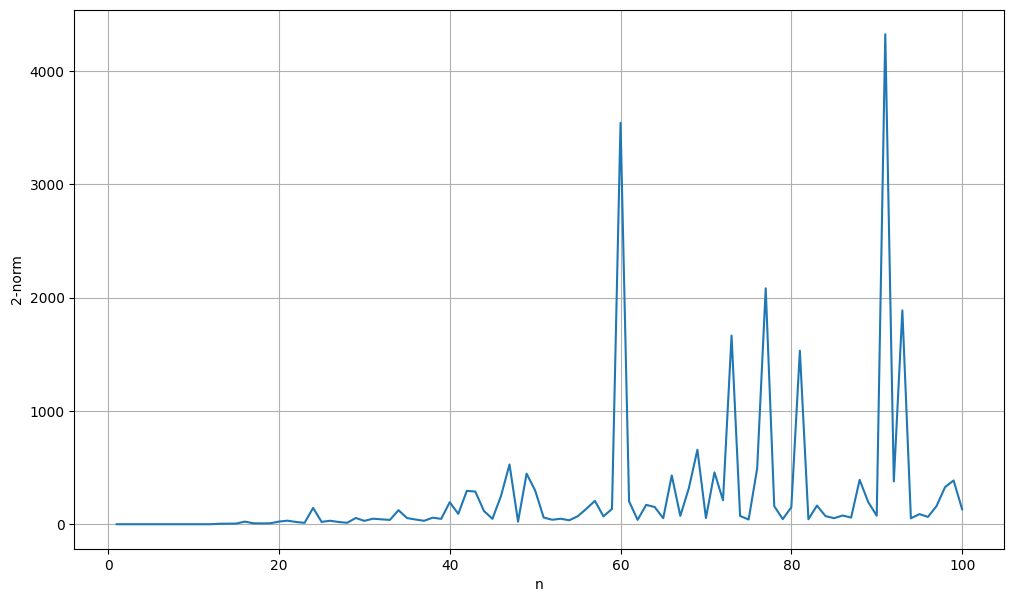

In [890]:
n =[]
for i in range(1,100+1):
    n.append(i)
y = []
for i in n:
    y.append(H_inverse_unit(i))
#print(y)
plt.figure(figsize=(12,7))
plt.plot(n,y)
plt.xlabel("n")
plt.ylabel("2-norm")
plt.grid(True)
plt.show()

Από τα αποτελέσματα του παραπάνω διαγράμματος παρατηρούμε ότι η 2-νόρμα όπως την υπολογίσαμε παραπάνω έχει μια ασταθή συμπεριφορά ανάλογα με τις τιμές του ```n``` παρουσιάζοντας μέγιστα και ελάχιστα. Κανονικά θα περιμέναμε εφόσον ισχύει $Η*Η^{-1} = Ι$ οι τιμές του παραπάνω διαγράμματος να είναι κοντά στο 0. Οι αποκλίσεις που προκύπτουν για $n > 12$ μας δείχνουν ότι από εκείνο το σημείο και έπειτα η διαδικασία αντιστροφής των πινάκων Hilbert δεν είναι ακριβής και προκύπτουν διάφορα σφάλματα προσέγγισης που επηρεάζουν το τελικό αποτέλεσμα. Αυτό μπορούμε να το δούμε και αν τυπώσουμε το $Η*Η^{-1}$ όπου θα παρατηρήσουμε ότι πράγματα  ορισμένα στοιχέια για $n > 12$ δεν είναι της τάξεως του $10^{-14}$ όπως θα περιμέναμε, δηλαδή πολύ κοντά στο $0$ αλλά υπάρχουν και στοιχεία της τάξεως του  $10^{-1}$ που επιδρούν σημαντικά στο τελικό αποτέλεσμα.

#  Πρόβλημα Προσέγγισης

Πρέπει να προσεγγίσουμε τη συνάρτηση $y(t) = cos(4t) + 0.1ε(t)$ μέσω ενός πολυωνύμου 4ου βαθμού $y(t) = e + dt + ct^2 + bt^3 + at^4 $ οπότε αρκεί να υπολογίσουμε τα $a, b, c, d, e$ με την μέθοδο των ελάχιστων τετραγώνων δηλαδή λύνοντας το σύστημα $A^TAx = A^Tb$ όπου ο πίνακας Α προκύπτει ως εξής:
\begin{align}
t &= 0 : y(0) = e + d*0 + c*0 + b*0 + a*0 \\
t &= 0.02 : y(0.02) = e + d*0.02 + c*0.02^2 + b*0.02^3 + e a*0.02^4 \\
t &= 0.04 : y(0.04) = e + d*0.04 + c*0.04^2 + b*0.04^3 + a*0.04^4 \\
. \\
. \\
. \\
t &= 1 : y(1) = a*1 + b*1 + c*1 + d*1 + e \\ 
\end{align}

\[
\begin{array}{ccc}
1 & 0 & 0 & 0 & 0 \\
1 & 0.02 & 0.02^2 & 0.02^3 & 0.02^4 \\
1 & 0.04 & 0.04^2 & 0.04^3 & 0.04^4 \\
. & . & . & . & . \\
1 & 1 & 1 & 1 & 1 \\
\end{array}
\]

$x$  είναι ο πίνακας στήλη με τους αγνώστους  $a, b, c, d, e$ και $b$ ο πίνακας στήλη με τα $y(0), y(0.02), y(0.04), . . . ,y(1)$



In [891]:
dif = 1/50
t = np.arange(0,1,dif) #initialize an array with the desired values 
y = np.cos(4*t) + 0.1 * np.random.randn(t.shape[0]) #initialize the output of the function using the above values 
#print(y)
n  = 4

Τώρα ας φτιάξουμε μια συνάρτηση ```least_squares``` στην οποία θα υπολογίζουμε τους πίνακες $M = A^TA$ και $N = A^Tb$ του προβλήματος όπως περιγράφηκε παραπάνω έτσι ώστε να λύσουμε το σύστημα $A^TAx = A^Tb$ που έχει πλέον μετατραπεί στο $Mx = N$. Εναλλακτικά υπ΄ραχει και η έτοιμη συνάρτηση  ```numpy.linalg.lstsq()``` η οποία λύνει συστήματα με την μέθοδο των ελάχιστων τετραγώνων απευθείας

In [892]:
def least_squares(t,y,n): # t: points , y: function, n: polynomial degree
    A = np.matrix(np.zeros((len(t),n+1))) # initialize A matrix with zero which here will be a 50x5 matrix
    b_row = np.array(np.zeros(len(y))) # initialize b array
    rows = A.shape[0] 
    cols = A.shape[1]
    for i in range(0,rows): #iterate through the rows of A to form it
        for j in range(0,cols): #iterate through the cols of A to form it
            A[i,j] = t[i] ** j #based on the above information this is how matrix A is formed
    for i in range(0,len(y)):
        b_row[i] = y[i] #based on the above information this is how array b is formed
    b_col = b_row.reshape(-1, 1) # transform row-array b into column_array b in order for the multiplication A.T * b_col to be valid
    M = A.T * A # we will form Mx = N system 
    N = A.T * b_col 
    
    return M, N    

Και τώρα ας εφαρμόσουμε την συνάρτηση ώστε να πάρουμε τους πίνακες $M$ και $N$ του προβλήματος που μελετάμε

In [893]:
M, N = least_squares(t,y,4)

Άρα τώρα έχοντας εφαρμόσει την μέθοδο ελαχίστων τετραγώνων και έχοντας σχηματίσει ένα σύστημα $Mx = N$ όπου $M, N$ είναι οι πίνακες που προέκυψαν από την παραπάνω συνάρτηση θα χρησιμοποιήσουμε τισ δύο αρχικές συναρτήσεις ```solve_system_LU``` και ```solve_system_QR``` προκειμένου να λύσουμε το σύστημα με δύο διαφορετικούς τρόπους. Για τον πρώτο τρόπο με $LU$ παραγοντοποίηση αρκεί να λύσουμε τα δύο συστήματα $Ly = b$ ως προς $y$ και ύστερα $Ux = y$ όπως γίνεται άλλωστε και στην πρώτη συνάρτηση και γι το δεύτερο τρόπο χρησιμοποιώντας $QR$ παραγοντοποίηση όπου αρκεί να λύσουμε το $Rx = Q^Tb$ όπως υλοποιείται στην δεύτερη συνάρτηση

Και τώρα θα καλέσουμε τις δύο συναρτήσεις ώστε να επαληθεύσουμε το αποτέλεσμα 

In [894]:
# for some reason this cell needs to run twice to compute the correct result
res_1_LU = solve_system_LU(M, N)
res_2_QR = solve_system_QR(M, N)
print(res_1_LU)
print()
print(res_2_QR)


[[  0.90261041]
 [  2.52121117]
 [-20.91729161]
 [ 25.4187453 ]
 [ -8.6382167 ]]

[[  0.90260976]
 [  2.52122477]
 [-20.91735315]
 [ 25.41884108]
 [ -8.63826463]]


Τώρα, ας υπολογίσουμε αρχικά τα τετραγωνικά σφάλματα για κάθε μία από τις μεθόδους:

In [895]:
LU_prediction = M * res_1_LU
QR_prediction = M * res_2_QR
LU_square_error = np.sum(np.square(LU_prediction - N))
QR_square_error = np.sum(np.square(QR_prediction - N))

Και τώρα ας φτιάξουμε τα δύο διαγράμματα. Πρώτα για την LU παραγοντοποίηση:

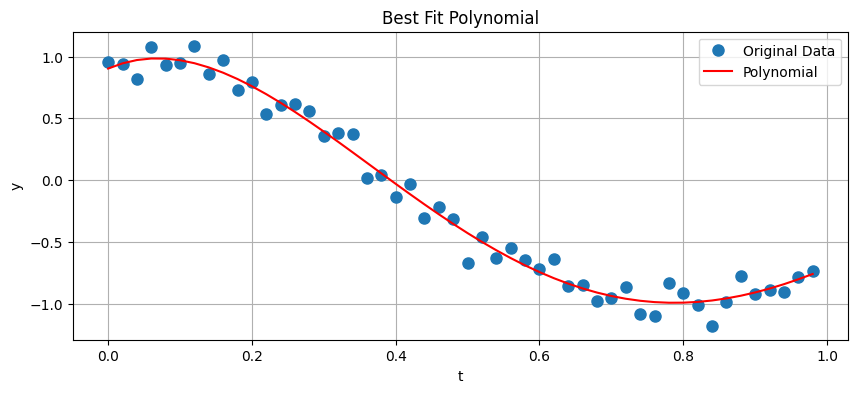

In [896]:
best_LU_polynomial = float(res_1_LU[0]) +  float(res_1_LU[1])*t +  float(res_1_LU[2])*(t**2) +  float(res_1_LU[3])*(t**3) +  float(res_1_LU[4])*(t**4)
plt.figure(figsize=(10,4))
plt.plot(t, y, 'o', label = "Original Data", markersize = 8)
plt.plot(t,best_LU_polynomial, "r", label = "Polynomial")
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.grid()
plt.title('Best Fit Polynomial')
plt.show()

Και έπειτα για την QR παραγοντοποίηση:

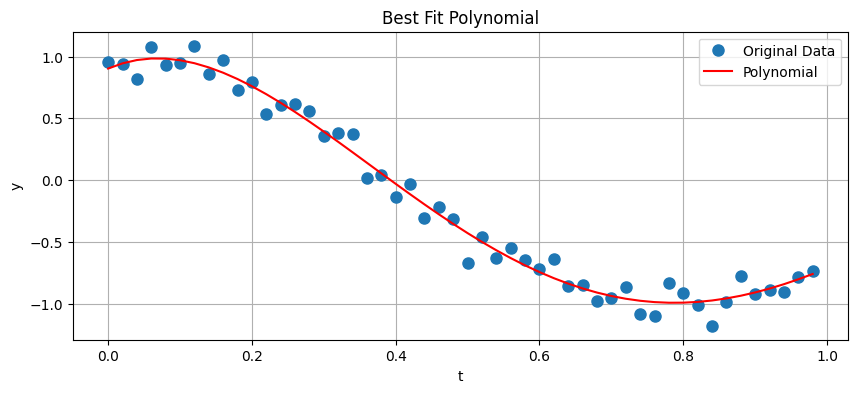

In [897]:
best_QR_polynomial = float(res_2_QR[0]) +  float(res_2_QR[1])*t +  float(res_2_QR[2])*(t**2) +  float(res_2_QR[3])*(t**3) +  float(res_2_QR[4])*(t**4)
plt.figure(figsize=(10,4))
plt.plot(t, y, 'o', label = "Original Data", markersize = 8)
plt.plot(t,best_QR_polynomial, "r", label = "Polynomial")
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.grid()
plt.title('Best Fit Polynomial')
plt.show()